##Análise Exploratória da Hemovigilância em Pós-Mercado utilizando linguagem Python (Banco de dados Pandas)


Assunto:

 -Captação de dados da Hemovigilância em Pós-Mercado e questionar a relação entre Grau de risco da análise de sangue e os locais de tratamento da Hemovigiância

Link do Repositório:

https://github.com/Aramischangchain/Projeto-Analise-Exploratoria

Integrantes:

Aramis Chang Chain, RGM: 8813440250

Link do Dataset:

https://dados.gov.br/dataset/hemovigilancia-em-pos-mercado/resource/d10c76b6-ff9e-4be8-8720-2d0f2dc2310e

Link do Dicionário de Dados:

https://dados.gov.br/dataset/hemovigilancia-em-pos-mercado/resource/1969c163-448d-4400-b7b5-c5c2f664fc61

## Leitura e análise inicial dos dados


In [ ]:
#importação de bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# lê o arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/DADOS_ABERTOS_HEMOVILIGANCIA_DADOSLIMPOS.csv', sep=',', encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [ ]:
df.head(10)

,Notificacao,Data da Ocorrencia,Data do Evento,Status da Analise,Tipo Reacao Transfusional,Grau Risco,Categoria do Notificador,Tipo de Hemocomponente,Faixa Etaria do Paciente,UF da Notificacao
0,200612000141,06/20/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,SC
1,200612000144,06/14/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,PLASMA FRESCO CONGELADO,DE 30 A 39 ANOS,SC
2,200612000146,04/24/2006 00:00:00,12/22/2006 00:00:00,Concluída,Sobrecarga circulatória associada à transfusão...,Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,SC
3,200612000152,07/18/2006 00:00:00,12/22/2006 00:00:00,Concluída,Outras reações imediatas (OI),Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,SC
4,200612000154,08/16/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,SC
5,200612000156,08/17/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 50 A 59 ANOS,SC
6,200612000157,06/15/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 40 A 49 ANOS,SC
7,200612000161,09/12/2006 00:00:00,12/23/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 20 A 29 ANOS,SC
8,200612000164,09/22/2006 00:00:00,12/23/2006 00:00:00,Concluída,Outras reações imediatas (OI),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS + CONCENTRADO DE PLA...,DE 40 A 49 ANOS,SC
9,200612000166,09/23/2006 00:00:00,12/23/2006 00:00:00,Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 40 A 49 ANOS,SC


In [ ]:
df['Status da Analise'].unique()

array(['Concluída', 'Não Concluída'], dtype=object)

Vamos começar com perguntas iniciais:

Qual a notificação máxima?

 Quantos valores únicos possuímos para a coluna Categoria do Notificador? e Grau de risco?

In [93]:
# Valores únicos para Categoria do Notificador
len(df.groupby(["Categoria do Notificador"]).size())

5

In [ ]:
# Valores únicos para Tipo de Reação Transfusional
len(df.groupby(["Tipo Reacao Transfusional"]).size())

22

In [ ]:
# Número de notificações maxima
df["Notificacao"].max()

202210001185

In [ ]:
# Valores únicos para Grau Risco
len(df.groupby(["Grau Risco"]).size())

5

#### Visualização da distribuição das variáveis

Existe alguma diferença na distribuição das redes de Hemovigiância?

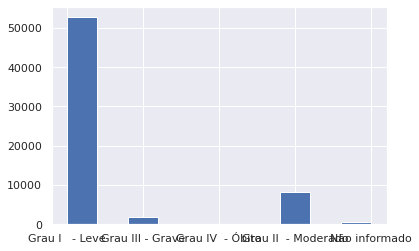

In [ ]:
# Resposta para distribuição de grau de risco entre pacientes da Rede Sentinela
df_cn_rs = df[df['Categoria do Notificador'] == 'Rede Sentinela']
df_cn_rs["Grau Risco"].hist(bins=10)      

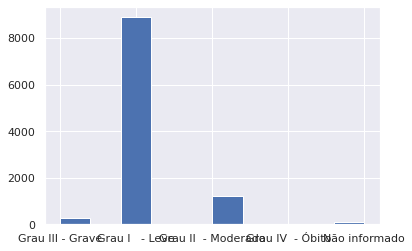

In [ ]:
# Resposta para distribuição de grau de risco entre pacientes de locais não especificados
df_cn_ne = df[df['Categoria do Notificador'] == 'Não especificado']
df_cn_ne["Grau Risco"].hist(bins=10)  

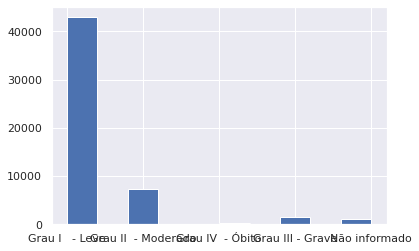

In [ ]:
# Resposta para distribuição de grau de risco entre pacientes com estabelecimento de Assistência à Saúde
df_cn_eas = df[df['Categoria do Notificador'] == 'Estabelecimento de Assistência à Saúde']
df_cn_eas["Grau Risco"].hist(bins=10)

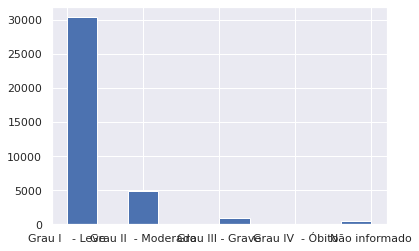

In [ ]:
# Resposta para distribuição de grau de risco entre pacientes com serviço de Hemoterapia
df_cn_sh = df[df['Categoria do Notificador'] == 'Serviço de Hemoterapia']
df_cn_sh["Grau Risco"].hist(bins=10)

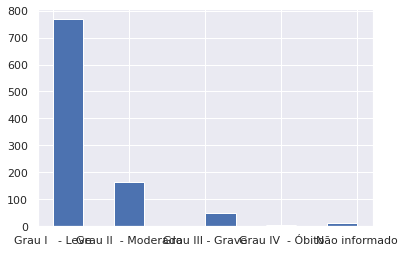

In [ ]:
# Resposta para distribuição de grau de risco entre pacientes de demais categorias
df_cn_dc = df[df['Categoria do Notificador'] == 'Demais categorias']
df_cn_dc["Grau Risco"].hist(bins=10)

Utilizando o seaborn para uma melhor visualização

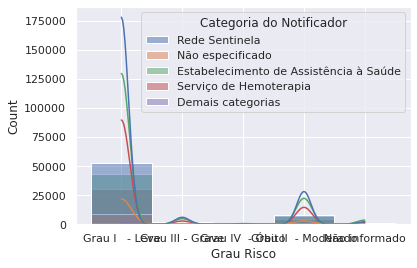

In [ ]:
sns.histplot(data=df, x="Grau Risco", kde=True, hue="Categoria do Notificador")

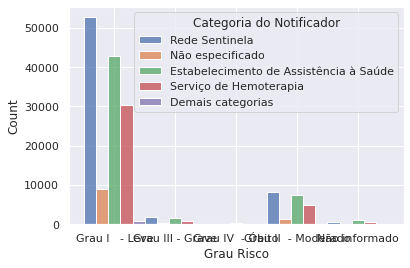

In [ ]:
sns.histplot(data=df, x="Grau Risco", hue="Categoria do Notificador", multiple="dodge", bins=100)

Análise da amostragem: Concluímos que a maioria dos locais de coleta da hemovigância teve um maior número de amostas do tipo Grau 1 - leve.




BoxPlot dos graus de risco de acordo com os locais de análise de hemovigilância para ver se as diferenças ficam mais óbvias.

In [ ]:
sns.boxplot(data=df, x="Grau Risco", y="Categoria do Notificador")

TypeError: ignored

### Seleção dos dados

filtração apenas linhas com os tipos de grau de risco mais comuns.

In [ ]:
df_grouped_top = df.groupby(['Grau Risco']).size().reset_index(name='COUNT')
df_grouped_top = df_grouped_top[df_grouped_top['COUNT'] > 100]
list_grouped = list(df_grouped_top['Grau Risco'])
list_grouped

['Grau I   - Leve',
 'Grau II  - Moderado',
 'Grau III - Grave',
 'Grau IV  - Óbito',
 'Não informado']

Criando um novo DataFrame contendo apenas o grau de risco com o tipo de ração tranfusional mais comum

In [ ]:
df_gr_mix = df[df['Grau Risco'].isin(list_grouped)]
df_gr_mix

,Notificacao,Data da Ocorrencia,Data do Evento,Status da Analise,Tipo Reacao Transfusional,Grau Risco,Categoria do Notificador,Tipo de Hemocomponente,Faixa Etaria do Paciente,UF da Notificacao
0,200612000141,06/20/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,SC
1,200612000144,06/14/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,PLASMA FRESCO CONGELADO,DE 30 A 39 ANOS,SC
2,200612000146,04/24/2006 00:00:00,12/22/2006 00:00:00,Concluída,Sobrecarga circulatória associada à transfusão...,Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,SC
3,200612000152,07/18/2006 00:00:00,12/22/2006 00:00:00,Concluída,Outras reações imediatas (OI),Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,SC
4,200612000154,08/16/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,SC
...,...,...,...,...,...,...,...,...,...,...
165402,202208005506,08/24/2022 00:00:00,08/29/2022 00:00:00,Concluída,Aloimunização/Aparecimento de anticorpos irreg...,Grau I - Leve,Estabelecimento de Assistência à Saúde,NÃO INFORMADO,DE 50 A 59 ANOS,DF
165403,202208005512,08/25/2022 00:00:00,08/29/2022 00:00:00,Não Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,SP
165404,202208005514,08/02/2022 00:00:00,08/29/2022 00:00:00,Não Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Estabelecimento de Assistência à Saúde,CONCENTRADO DE HEMÁCIAS,DE 50 A 59 ANOS,CE
165405,202208005516,08/24/2022 00:00:00,08/29/2022 00:00:00,Não Concluída,Reação alérgica (ALG),Grau I - Leve,Serviço de Hemoterapia,CONCENTRADO DE PLAQUETAS,DE 40 A 49 ANOS,MG


### Análise de similaridades entre os Graus de riscos

In [94]:
df_cross = pd.crosstab(df_gr_mix.Categoria do Notificador, df_gr_mix.Grau Risco)
df_cross.head(20)

SyntaxError: ignored

Usando o DataFrame obtido anteriormente vamos gerar a matriz de correlações entre bairros

In [98]:
df_corr = df_cross.corr()
df_corr

,Notificacao
Notificacao,1.0


In [97]:
df_corr = df_corr.style.background_gradient(cmap="RdBu")
df_corr

,Notificacao
Notificacao,1.000000


In [90]:
df_gr_mix = pd.DataFrame(df_cross.sum(), columns=['COUNT'])
df_gr_mix

,COUNT
Notificacao,33355923143227046
Data da Ocorrencia,06/20/2006 00:00:0006/14/2006 00:00:0004/24/20...
Data do Evento,12/22/2006 00:00:0012/22/2006 00:00:0012/22/20...
Status da Analise,ConcluídaConcluídaConcluídaConcluídaConcluídaC...
Tipo Reacao Transfusional,Reação alérgica (ALG)Reação alérgica (ALG)Sobr...
Grau Risco,Grau I - LeveGrau I - LeveGrau III - Grave...
Categoria do Notificador,Rede SentinelaRede SentinelaRede SentinelaRede...
Tipo de Hemocomponente,CONCENTRADO DE HEMÁCIASPLASMA FRESCO CONGELADO...
Faixa Etaria do Paciente,DE 60 A 69 ANOSDE 30 A 39 ANOSDE 60 A 69 ANOSM...
UF da Notificacao,SCSCSCSCSCSCSCSCSCSCSCSCSCSCSCSCRSRSBARSRSRSRS...


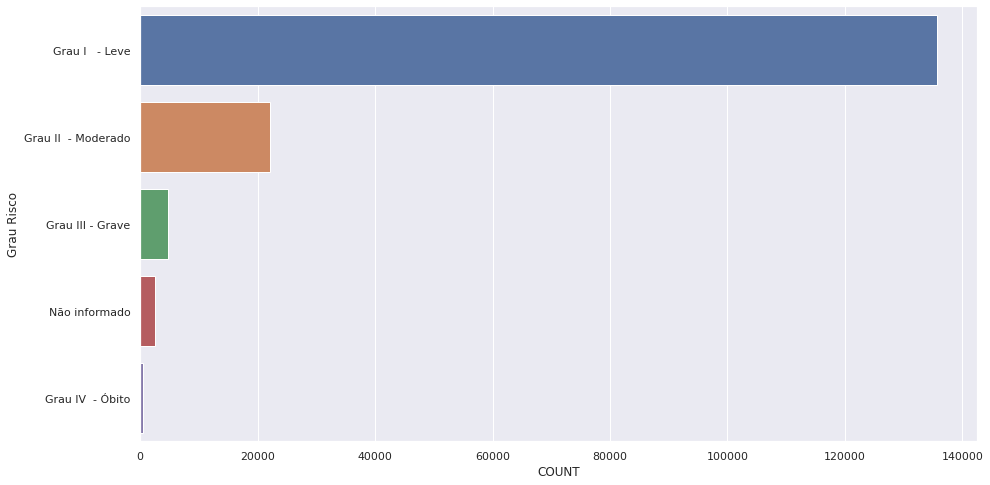

In [96]:
dfgraph = df.groupby(['Grau Risco']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="Grau Risco", orient="h")

Conclusão entre a Análise:

Mesmo com o número de Grau 1 - Leve sendo drasticamente maior que as outras gravidades, a porcentagem entre os locais que fazem a Hemovigiância em Pós-Mercado é relativamente parecida entre todos os graus de risco das amostras de sangue, principalmente entre o Grau 1 - Leve e o Grau 3 - Grave.